<a href="https://colab.research.google.com/github/mdikas/Sentiment-Analysis-Lyrics-Slipknot/blob/main/Sentiment_Analysis_Lyrics_Slipknot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import string 
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data

In [107]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.

True

In [72]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Data_Lirik.csv',encoding="ISO-8859-1")

In [73]:
df.head()

,Unnamed: 0,artist,album,title,release,decade,lyric
0,0,Slipknot,Album 4,Snuff,2009,00s,[Intro]\n\n[Verse 1]\nBury all your secrets in...
1,1,Slipknot,Album 4,Psychosocial,2008,00s,"[Intro: Corey Taylor]\nOoh, yeah\n\n[Verse 1: ..."
2,2,Slipknot,Album 3,Duality,2004,00s,[Chorus]\nI push my fingers into my eyes\nIt's...
3,3,Slipknot,Album 6,Unsainted,2019,10s,"[Intro]\nOh, I'll never kill myself to save my..."
4,4,Slipknot,Album 5,The Devil in I,2014,10s,"[Verse 1]\nUndo these chains, my friend, I'll ..."


In [74]:
df = df.drop(columns=['Unnamed: 0'])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   artist   66 non-null     object
 1   album    66 non-null     object
 2   title    66 non-null     object
 3   release  66 non-null     int64 
 4   decade   66 non-null     object
 5   lyric    66 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.2+ KB


In [76]:
df['lyric'].loc[1:2]

1    [Intro: Corey Taylor]\nOoh, yeah\n\n[Verse 1: ...
2    [Chorus]\nI push my fingers into my eyes\nIt's...
Name: lyric, dtype: object

In [77]:
df['lyric'] = df['lyric'].str.lower()
df['lyric'] = df['lyric'].str.replace("verse |[1|2|3]|chorus|bridge|outro","").str.replace("[","").str.replace("]","")
df['lyric'] = df['lyric'].str.lower().str.replace("instrumental|intro|guitar|solo","")
df['lyric'] = df['lyric'].str.replace("\n"," ").str.replace(r"[^\w\d'\s]+","").str.replace("efil ym fo flah","")
df['lyric'] = df['lyric'].str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [78]:
df['lyric']

0     bury all your secrets in my skin come away wit...
1     corey taylor ooh yeah   corey taylor i did my ...
2     i push my fingers into my eyes it's the only t...
3     oh i'll never kill myself to save my soul i wa...
4     undo these chains my friend i'll show you the ...
                            ...                        
61    corey taylor my freedom is best whole country'...
62    we too feel alone we too feel alone we too fee...
63    the whole world is my enemy and i'm a walking ...
64    zero and zero is nothing but zero cancer and p...
65    give me the dust of my father stand on the fac...
Name: lyric, Length: 66, dtype: object

In [79]:
words = []
df = df.reset_index(drop=True)

In [80]:
def unique(list1):
    unique_list = []
    
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [81]:
def lyrics_to_words(document):
    
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

In [82]:
for word in df['lyric'].tolist():
    words.append(unique(lyrics_to_words(word).split()))

In [83]:
df['words'] = words

In [84]:
set_words = []
set_album = []

In [85]:
for i in df.index:
  for word in df['words'].iloc[i]:
    set_words.append(word)
    set_album.append(df['album'].iloc[i])

In [86]:
print(set_words)

['bury', 'secret', 'skin', 'come', 'away', 'innocence', 'leave', 'sin', 'air', 'around', 'still', 'feel', 'like', 'cage', 'love', 'camouflage', 'resembles', 'rage', 'let', 'go', 'run', 'know', 'heart', 'dark', 'care', 'cant', 'destroy', 'deliver', 'fate', 'im', 'alone', 'cannot', 'hate', 'deserve', 'ooh', 'smile', 'taken', 'long', 'ago', 'change', 'hope', 'never', 'press', 'letter', 'lip', 'cherish', 'part', 'savor', 'every', 'kiss', 'face', 'life', 'without', 'light', 'ripped', 'apart', 'refused', 'fight', 'save', 'breath', 'hear', 'think', 'made', 'clear', 'enough', 'supposed', 'wish', 'friend', 'could', 'hurt', 'end', 'claimed', 'saint', 'banished', 'took', 'death', 'oh', 'break', 'stone', 'spit', 'pity', 'soul', 'needed', 'help', 'sold', 'listen', 'shame', 'ran', 'angel', 'lie', 'keep', 'control', 'punished', 'ever', 'corey', 'taylor', 'ooh', 'yeah', 'time', 'want', 'effusive', 'fade', 'cut', 'soul', 'vibrant', 'reckoning', 'sickening', 'packaging', 'subversion', 'pseudosacrosanct'

In [87]:
print(len(set_words),len(set_album))

5702 5702


In [88]:
words_df = pd.DataFrame({'words':set_words,'album':set_album})

In [89]:
stop_words = ['verse','im','get','cant','go','one',
              'never','see','know','another','want','ive','ill','pre','way','away','feel'
              ,'like','let','make','say','yeah','oh','ooh','taylor','corey','ah','087','aah','ãâåhahaãâï','ãââ','youãââ'
             ,'got','need']

In [90]:
cv = CountVectorizer(stop_words = stop_words)
text_cv = cv.fit_transform(words_df['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['album'] = words_df['album']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [91]:
vect_words = data_cv.groupby('album').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

In [92]:
vect_words

,words,Album 1,Album 2,Album 3,Album 4,Album 5,Album 6
0,abandoned,0,0,0,0,1,0
1,abhor,0,0,0,0,0,1
2,able,0,0,0,1,0,0
3,abscess,0,0,0,0,1,0
4,absolute,0,0,1,0,0,0
...,...,...,...,...,...,...,...
2058,year,2,0,1,0,2,2
2059,yes,2,0,1,0,0,0
2060,yesterday,0,0,0,0,0,1
2061,yet,0,1,2,0,1,0


In [93]:
vect_words.to_csv('words.csv', index=False)
vect_words = vect_words[['words','Album 1','Album 2','Album 3'
                        ,'Album 4','Album 5','Album 6']]

<Figure size 432x288 with 0 Axes>

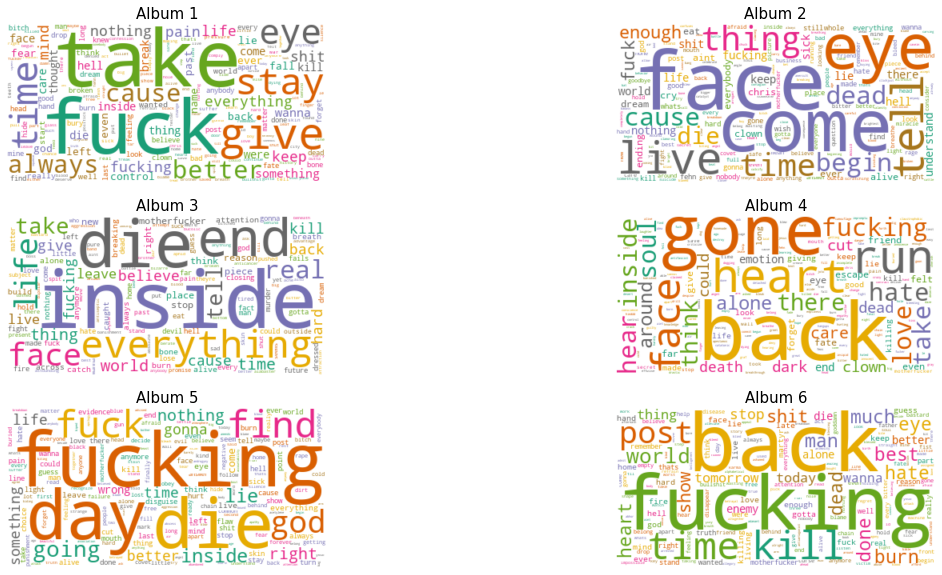

In [94]:
def plot_wordcloud(df,row,col):
    wc = WordCloud(background_color='white',colormap='Dark2',
                  max_font_size=100,random_state=15)
    fig = plt.figure(figsize=(20,10))
    
    for index, value in enumerate(df.columns[1:]):
        top_dict = dict(zip(df['words'].tolist(),df[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{value}",fontsize=15)
        
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.show()

plot_wordcloud(vect_words,3,2)

In [95]:
def words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_songs = []
    years = []
    for value in df.columns[1:]:
         unique_words.append(np.count_nonzero(df[value]))
         total_words.append(sum(df[value]))
         years.append(str(value))
         total_songs.append(main_df['album'][main_df['album']==value].count())
    
    data = pd.DataFrame({'album':years,'unique_words':unique_words,'total_words':total_words,'total_songs':total_songs})
    data['words_per_song'] = round(data['total_words'] / data['total_songs'],0)
    data['words_per_song'] = data['words_per_song'].astype('int')
    return data


In [96]:
words_stats(vect_words,df)

,album,unique_words,total_words,total_songs,words_per_song
0,Album 1,802,1212,15,81
1,Album 2,575,785,11,71
2,Album 3,534,676,9,75
3,Album 4,344,415,7,59
4,Album 5,714,989,13,76
5,Album 6,619,863,11,78


In [102]:
top_words = vect_words.sort_values(['Album 2'],ascending=False).head(10)

In [103]:
top_words

,words,Album 1,Album 2,Album 3,Album 4,Album 5,Album 6
657,face,5,6,4,3,3,3
1829,thing,5,5,4,1,3,4
1851,time,8,5,4,2,5,6
1812,tell,3,5,4,1,3,1
1055,live,2,5,3,0,4,3
656,eye,7,5,1,2,4,4
340,come,5,5,2,1,4,2
2038,world,4,4,4,0,3,5
859,hell,5,4,2,0,3,3
1214,nothing,6,4,2,1,6,2


In [108]:
negative = []
neutral = []
positive = []
compound = []

#Initialize the model
sid = SentimentIntensityAnalyzer()

#Iterate for each row of lyrics and append the scores
for i in df.index:
    scores = sid.polarity_scores(df['lyric'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

#Create 4 columns to the main data frame  for each score 
df['negative'] = negative
df['neutral'] = neutral
df['positive'] = positive
df['compound'] = compound

In [109]:
df['compound'].max()

0.9981

In [110]:
df.loc[df.compound == 0.9981, :]

,artist,album,title,release,decade,lyric,words,negative,neutral,positive,compound
46,Slipknot,Album 4,All Hope Is Gone,2008,00s,pain she loves me wants me to be less scared m...,"[pain, love, want, le, scared, free, feel, ver...",0.129,0.422,0.449,0.9981


In [111]:
df['compound'].min()

-0.9998

In [112]:
df.loc[df.compound == -0.9998, :]

,artist,album,title,release,decade,lyric,words,negative,neutral,positive,compound
60,Slipknot,Album 3,Danger Keep Away,2004,00s,corey taylor ross robinson fuck give me a scr...,"[corey, taylor, ross, robinson, fuck, give, sc...",0.536,0.409,0.055,-0.9998


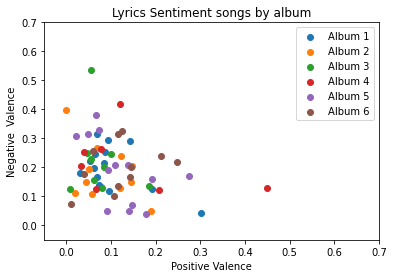

In [115]:
for name, group in df.groupby('album'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend(fontsize=10)

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])

plt.title("Lyrics Sentiment songs by album")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

In [116]:
means_df = df.groupby(['album']).mean()
means_df 

,release,negative,neutral,positive,compound
album,,,,,
Album 1,1999.000000,0.196000,0.705067,0.099067,-0.725440
Album 2,2001.000000,0.181909,0.730455,0.087818,-0.723645
Album 3,2004.000000,0.222778,0.701889,0.075444,-0.759278
Album 4,2008.142857,0.216000,0.642286,0.141857,-0.421771
Album 5,2014.000000,0.190692,0.688385,0.121000,-0.104769
Album 6,2019.000000,0.201182,0.678727,0.120000,-0.640118


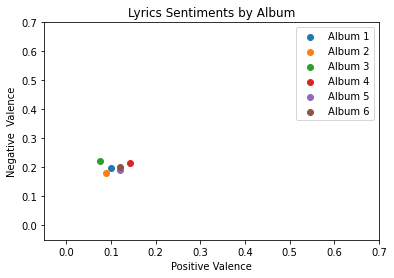

In [117]:
for name, group in means_df.groupby('album'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Lyrics Sentiments by Album")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')

plt.show()